In [1]:
from naive_rag import naive_rag_translated
from init_vectorstore import init_vectorstore
from langchain_experimental.text_splitter import SemanticChunker
from ragas_func import ragas_with_params
import os
from langchain_text_splitters import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.embeddings import SentenceTransformerEmbeddings
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
os.environ["OPENAI_API_KEY"] = "sk-proj-xUkAvpOItzlPuQTwECOqT3BlbkFJ3Izx08GLkQTIEH2idnqb"

## Vectorstores: ChromaDB, FAISS, Qdrant
## Embeddings: "text-embedding-3-large", "paraphrase-multilingual-mpnet-base-v2", "multilingual-e5-large"
## Text splitters: CharacterTextSplitter, RecursiveCharacterTextSplitter, SemanticChunker 


In [2]:
instances = 20
file_path = "/Users/adrianfolge/Documents/lokal:skole/Master/data/synthetic_data/vol2_questions_and_answers_ytterligere_revidert.csv"

In [3]:
references = load_dataset('csv', data_files=file_path, split=f"train[:{instances}]")
refs = references["svar"]
questions = references["spørsmål"]

In [4]:
from deep_translator import GoogleTranslator

questions_translated = []
for question in questions:
    translated_question = GoogleTranslator(source='no', target='en').translate(text=question)
    questions_translated.append(translated_question)

In [5]:
recursive_text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
character_text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=0)
semantic_text_splitter = SemanticChunker(
    OpenAIEmbeddings(), breakpoint_threshold_type="percentile"
)

In [6]:
embeddings_para = SentenceTransformerEmbeddings(model_name='sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
embeddings_multiling = SentenceTransformerEmbeddings(model_name='intfloat/multilingual-e5-large')
embeddings_openai = OpenAIEmbeddings(model="text-embedding-3-small")

In [7]:
text_splitters = [recursive_text_splitter, character_text_splitter]
embeddings = [embeddings_para, embeddings_multiling, embeddings_openai]

In [8]:
list_of_scores = []
for text_splitter in text_splitters:
    for embedding in embeddings:
        databases = init_vectorstore(embedding, text_splitter, translate=True)
        naive_rag_list = naive_rag_translated(instances, file_path, databases)
        naive_rag_score = ragas_with_params(naive_rag_list, questions_translated, naive_rag_list, refs)
        score = {
            "text_splitter": text_splitter,
            "embedding model": embedding,
            "score": naive_rag_score
        }
        list_of_scores.append(score)
        

100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:05<00:00,  1.71it/s]
Created a chunk of size 1147, which is longer than the specified 500
Created a chunk of size 1570, which is longer than the specified 500
Created a chunk of size 639, which is longer than the specified 500
Created a chunk of size 610, which is longer than the specified 500
Created a chunk of size 1008, which is longer than the specified 500
Created a chunk of size 545, which is longer than the specified 500
Created a chunk of size 536, which is longer than the specified 500
Created a chunk of size 583, which is longer than the specified 500
Created a chunk of size 1162, which is longer than the specified 500
Created a chunk of size 607, which is longer than the specified 500
Created a chunk of size 1206, which is longer than the specified 500
Created a chunk of size 697, which is longer than the specified 500
Created a chunk of size 734, which is longer than the specified 500
Created a chunk of size 916, which is longer than the specified

Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
Created a chunk of size 1147, which is longer than the specified 500
Created a chunk of size 1570, which is longer than the specified 500
Created a chunk of size 639, which is longer than the specified 500
Created a chunk of size 610, which is longer than the specified 500
Created a chunk of size 1008, which is longer than the specified 500
Created a chunk of size 545, which is longer than the specified 500
Created a chunk of size 536, which is longer than the specified 500
Created a chunk of size 583, which is longer than the specified 500
Created a chunk of size 1162, which is longer than the specified 500
Created a chunk of size 607, which is longer than the specified 500
Created a chunk of size 1206, which is longer than the specified 500
Created a chunk of size 697, which is longer than the specified 500
Created a chunk of size 734, which is longer than the specified 500
Created a chunk of size 916, which is longer than the specified

Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:05<00:00,  1.70it/s]
Created a chunk of size 1147, which is longer than the specified 500
Created a chunk of size 1570, which is longer than the specified 500
Created a chunk of size 639, which is longer than the specified 500
Created a chunk of size 610, which is longer than the specified 500
Created a chunk of size 1008, which is longer than the specified 500
Created a chunk of size 545, which is longer than the specified 500
Created a chunk of size 536, which is longer than the specified 500
Created a chunk of size 583, which is longer than the specified 500
Created a chunk of size 1162, which is longer than the specified 500
Created a chunk of size 607, which is longer than the specified 500
Created a chunk of size 1206, which is longer than the specified 500
Created a chunk of size 697, which is longer than the specified 500
Created a chunk of size 734, which is longer than the specified 500
Created a chunk of size 916, which is longer than the specified

Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

In [9]:
with open('/Users/adrianfolge/Documents/lokal:skole/Master/master_folder/eval_data/embeddings_and_text_splitters_FAISS_translated.txt', 'w') as f:
    for item in list_of_scores:
        f.write(str(item) + '\n')

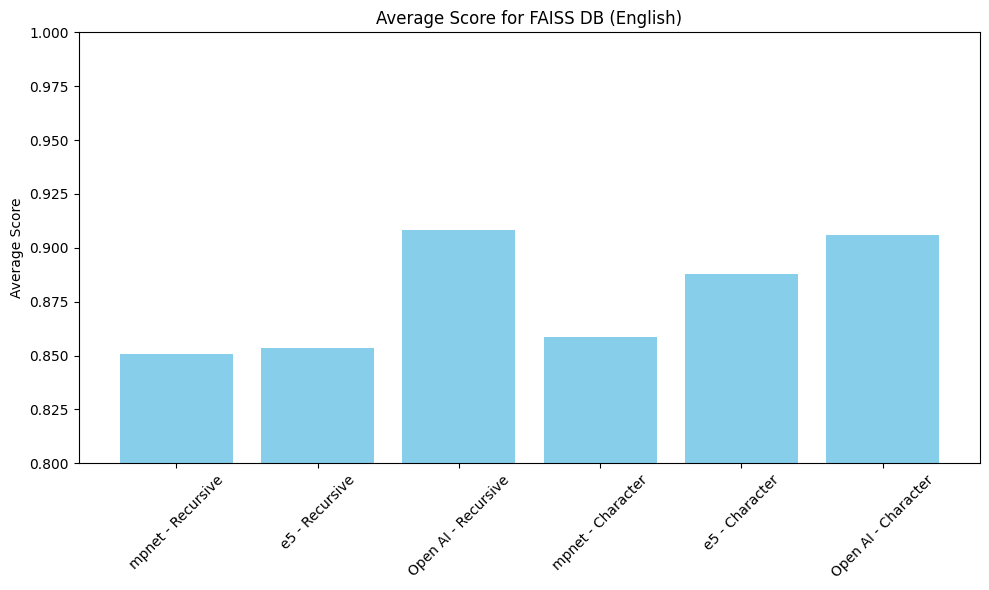

In [11]:
# Data
data = {
    'Embedding model': ['mpnet', 'e5', 'Open AI', 'mpnet', 'e5', 'Open AI'],
    'Text splitter': ['Recursive', 'Recursive', 'Recursive', 'Character', 'Character', 'Character'],
    'Context precision': [0.8500, 0.8000, 0.9000, 0.8500, 0.8500, 0.9000],
    'Faithfulness': [0.9108, 0.9542, 0.9692, 0.8925, 0.9725, 0.9608],
    'Answer relevancy': [0.8418, 0.8355, 0.8392, 0.8419, 0.8296, 0.8387],
    'Context recall': [0.8000, 0.8250, 0.9250, 0.8500, 0.9000, 0.9250]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate average score for each row
df['Average'] = df[['Context precision', 'Faithfulness', 'Answer relevancy', 'Context recall']].mean(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Average'], color='skyblue')
plt.ylabel('Average Score')
plt.title('Average Score for FAISS DB (English)')
plt.xticks(df.index, df['Embedding model'] + ' - ' + df['Text splitter'], rotation=45)
plt.ylim(0.8, 1)
plt.tight_layout()
plt.show()